In [29]:
import matplotlib.pyplot as plt
import numpy as np 

%matplotlib inline
# %config InlineBackend.figure_format='retina'

plt.rcParams['figure.figsize'] = (20, 10)

### [FitzHugh-Nagumo model](http://www.scholarpedia.org/article/FitzHugh-Nagumo_model)

\begin{matrix} 
\dot{V} & = &  V-V^3/3 - W +  I  \\
\dot{W} & = & 0.08(V+0.7 - 0.8W)    
\end{matrix}

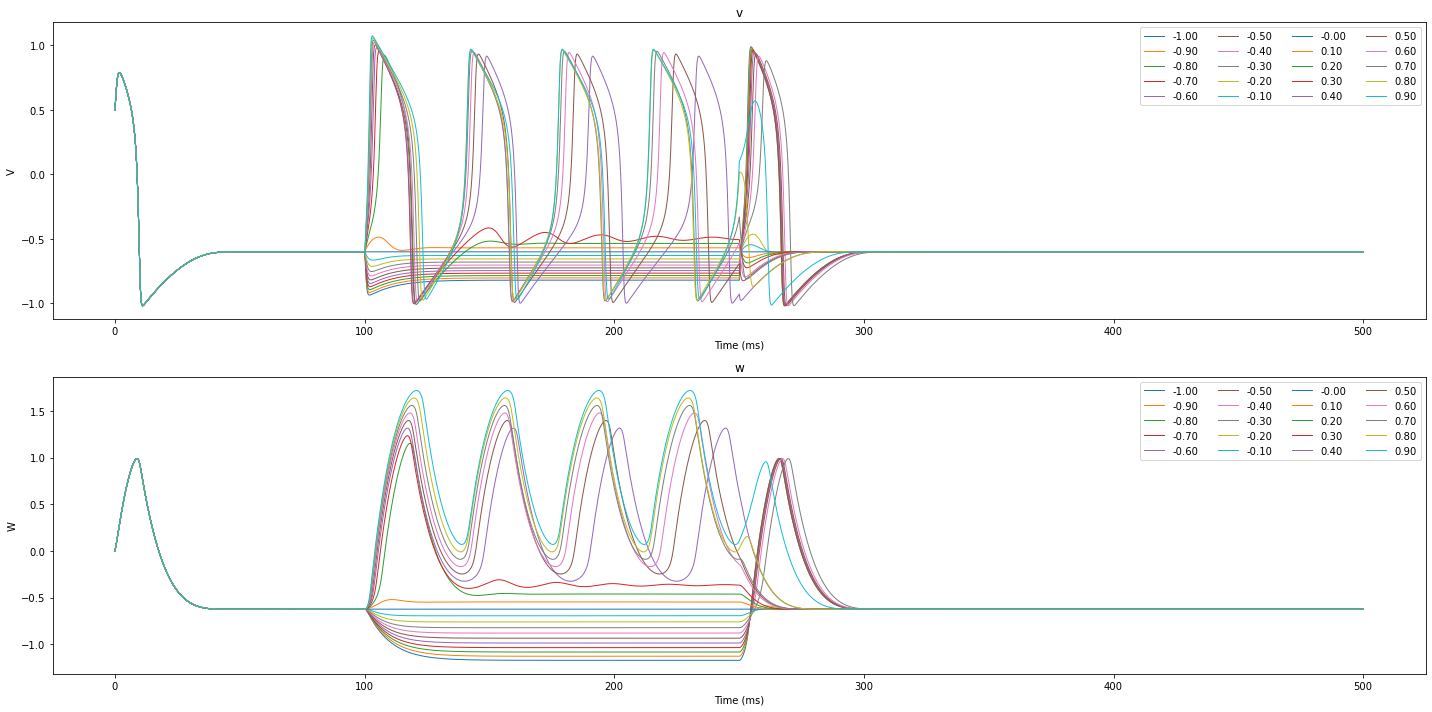

In [30]:
def fhn(v, w, i):
    v = v
    w = w
    i = i
    t = 0 #ms
    sim_time = 500  #ms
    step_size = 0.1 #ms
    
    tstart = 100    #ms
    tend = 250     #ms
    
    v_trace = [v]
    w_trace = [w]
    t_trace = [t]
    
    def forw_euler(v, w, i):
        """
        Calculate dv/dt and dw/dt.
        """
        dvdt = v - (v**3)/3 - w + i
        dwdt = 0.08 * (v + 0.7 - 0.8 * w)
        return dvdt, dwdt
    
    gradv_trace = [forw_euler(v, w, i)[0]]
    gradw_trace = [forw_euler(v, w, i)[1]]
    
    #Run the simulation
    while t < sim_time:
        
        if (t >= tstart) & (t <= tend):
            dv, dw = forw_euler(v, w, i)
        else: 
            dv, dw = forw_euler(v, w, 0)
            
        v += dv*step_size
        w += dw*step_size
        t += step_size
        v_trace.append(v)
        w_trace.append(w)
        t_trace.append(t)
        gradv_trace.append(dv)
        gradw_trace.append(dw)
    
    return v_trace, w_trace, gradv_trace, gradw_trace, t_trace

fig, ax = plt.subplots(nrows = 2)

# Generate v trace amd w trace for different I!
for i in np.arange(-1, 1, 0.1):
    v, w, dv, dw, t = fhn(1.0, 0, i)
    for j in range(len(v)):
        v[j] = v[j]*0.5
    ax[0].plot(t,v, lw = 1, label = f"{i:.2f}")
    ax[1].plot(t,w, lw = 1, label = f"{i:.2f}")
    ax[0].set_title("v")
    ax[1].set_title("w")

ax[0].set_xticks(np.arange(0, t[-1], 100))
ax[1].set_xticks(np.arange(0, t[-1], 100))

ax[0].set_xlabel("Time (ms)")
ax[0].set_ylabel("V")

ax[1].set_xlabel("Time (ms)")
ax[1].set_ylabel("W")

fig.tight_layout()
ax[0].legend(ncol = 4)
ax[1].legend(ncol = 4)
plt.show()

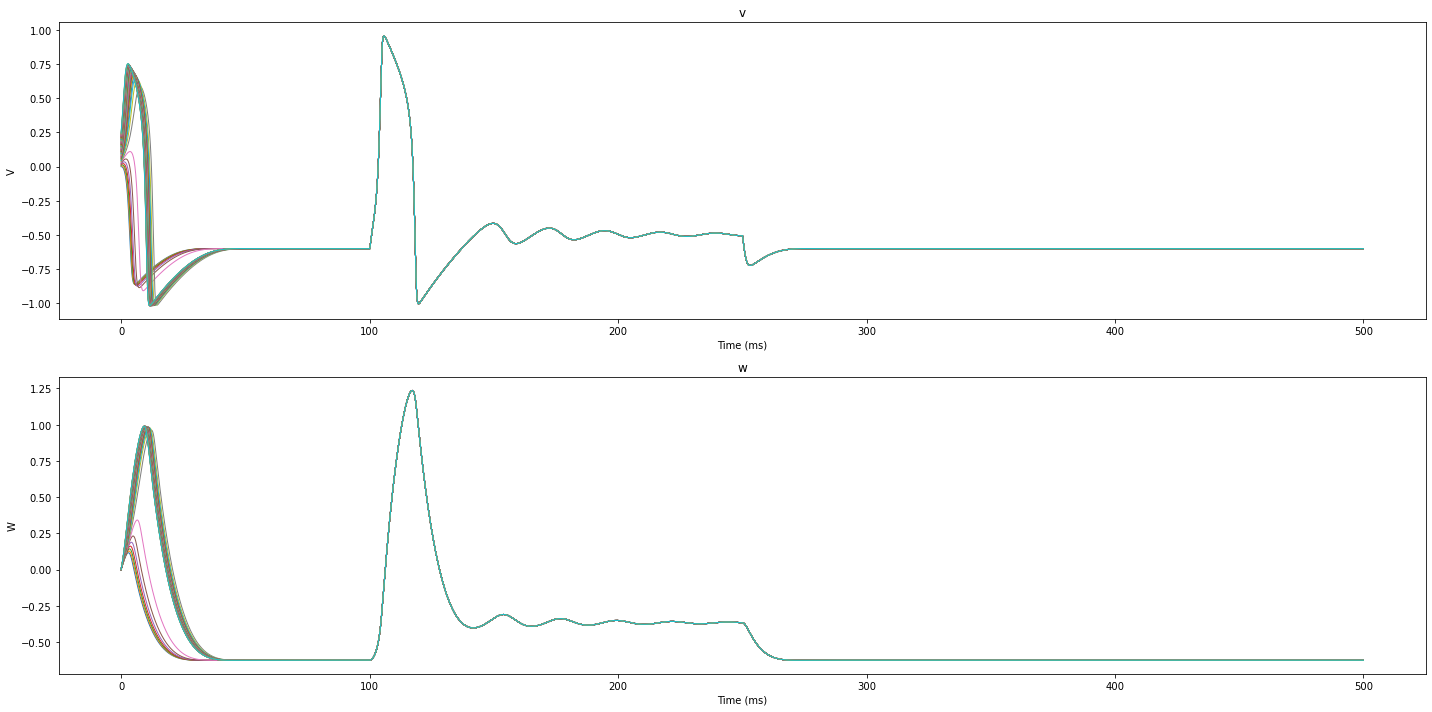

In [66]:
init_v = np.arange(0,0.5,0.01)
curr = 0.3
fig, ax = plt.subplots(nrows = 2)

for val in init_v:
    v, w, dv, dw, t = fhn(val, 0, curr)
    for j in range(len(v)):
        v[j] = v[j]*0.5
    ax[0].plot(t,v, lw = 1, label = val)
    ax[1].plot(t,w, lw = 1, label = val)
    ax[0].set_title("v")
    ax[1].set_title("w")
ax[0].set_xticks(np.arange(0, t[-1], 100))
ax[1].set_xticks(np.arange(0, t[-1], 100))

ax[0].set_xlabel("Time (ms)")
ax[0].set_ylabel("V")

ax[1].set_xlabel("Time (ms)")
ax[1].set_ylabel("W")

fig.tight_layout()
plt.show()

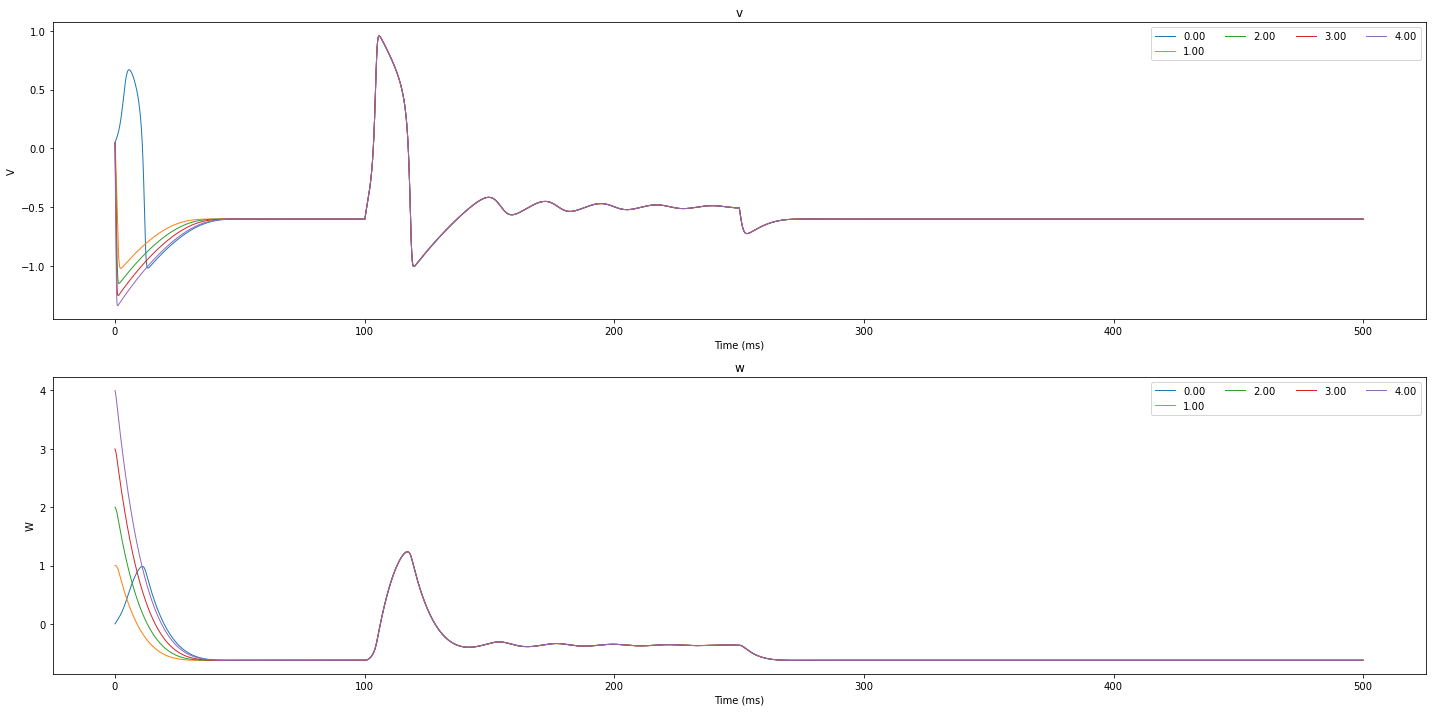

In [67]:
fig, ax = plt.subplots(nrows = 2)
init_w = np.arange(0,5)
v1 = 0.1

for val in init_w:
    v, w, dv, dw, t = fhn(v1, init_w[val], curr)
    for j in range(len(v)):
        v[j] = v[j]*0.5
    ax[0].plot(t,v, lw = 1, label = f'{init_w[val]:.2f}')
    ax[1].plot(t,w, lw = 1, label = f'{init_w[val]:.2f}')
    ax[0].set_title("v")
    ax[1].set_title("w")
ax[0].set_xticks(np.arange(0, t[-1], 100))
ax[1].set_xticks(np.arange(0, t[-1], 100))

ax[0].set_xlabel("Time (ms)")
ax[0].set_ylabel("V")

ax[1].set_xlabel("Time (ms)")
ax[1].set_ylabel("W")

fig.tight_layout()
ax[0].legend(ncol = 4)
ax[1].legend(ncol = 4)
plt.show()